<a href="https://colab.research.google.com/github/shrookehab/Machine_Learning1/blob/main/Polynomial_Regression/Polynomial_regression_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing and regularization

In [62]:
!git clone https://github.com/shrookehab/Machine_Learning1.git
%cd  Machine_Learning1/Polynomial_Regression

Cloning into 'Machine_Learning1'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 23 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.
/content/Machine_Learning1/Polynomial_Regression/Machine_Learning1/Polynomial_Regression/Machine_Learning1/Polynomial_Regression/Machine_Learning1/Polynomial_Regression/Machine_Learning1/Polynomial_Regression


In [8]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

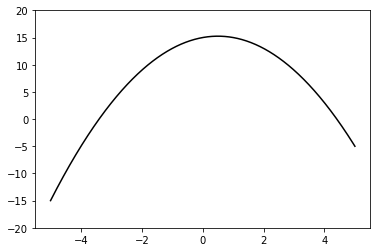

In [9]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [10]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

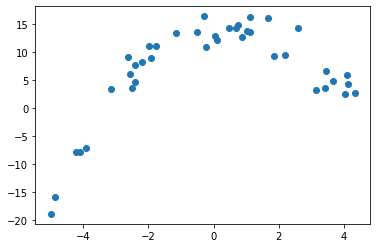

In [11]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [12]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [13]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    X = X.reshape(-1,1)
    poly = PolynomialFeatures(degree=polyDegree, include_bias=False)
    X = poly.fit_transform(X)

    return X
X_poly=addPoly(X,200)

In [14]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

## Splitting data into training and testing

In [50]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.20)

In [51]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [55]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)

model_no_reg = LinearRegression(normalize=True).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Training error (rmse): 0.0023324301199399928
Testing error (rmse): 1.4404428969116679e+23


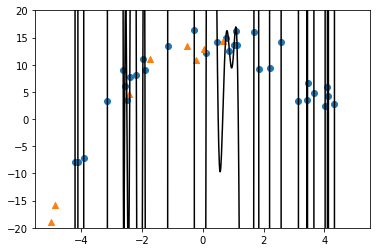

Polynomial coefficients
[-383.9544487054756, 4058.1379240269384, -148.41089816228458, -52553.68560335934, 95458.0068529555, 44359.46845413433, -205723.82449738393, 39882.40475731412, 183783.06294539504, -71285.43273636689, -91568.36800313932, 41331.04564875728, 28312.96631218905, -12474.696037499576, -5583.270127410518, 2087.23416294021, 672.8860188040002, -175.1322545066201, -41.29963394030841, 3.30309852388402, 0.23116303639296495, 0.4040579670844408, 0.08381460599018863, -0.005481577709088622, 0.0005450738250471335, -0.0011463272996162063, -0.00016137219597837596, -3.2601252977885495e-05, -7.744462199631433e-06, 1.141786973239424e-06, -4.905602578057639e-08, 1.489469264434248e-07, 1.3193220578196674e-08, 7.2160980568383e-09, 9.02211198704931e-10, 1.6017567651542942e-10, 3.091430385988933e-11, -5.2854128906911835e-12, 2.1890274605043207e-13, -8.142542720220204e-13, -4.954314354971136e-14, -5.474235301387702e-14, -4.070464431706997e-15, -2.688422258701715e-15, -1.9621420950350854e-16,

In [56]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [57]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)

model_L1_reg = linear_model.Lasso(alpha=0.1, normalize=True).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Training error (rmse): 2.162649282715434
Testing error (rmse): 1.5266378230306379


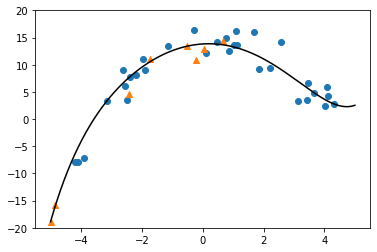

Polynomial coefficients
[13.822627033212735, 0.35131924648753987, -0.8798107883987627, 0.0, -0.0, 0.0016458382922914648, -0.0, 4.881835101750462e-05, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.

In [58]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [59]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)

model_L2_reg = linear_model.Ridge(alpha=0.1, normalize=True).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Training error (rmse): 1.9900353046620396
Testing error (rmse): 41859637850.492096


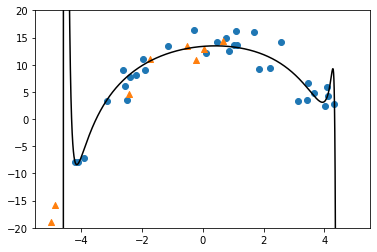

Polynomial coefficients
[13.373775387691168, 0.4647985164474707, -0.5585575786113406, 0.00926197539834738, -0.016551826997399627, 0.0002848469362864722, -0.0005157460417059177, 1.9360717956067144e-05, -1.5855058617960197e-05, 1.3916802220292512e-06, -4.381775933997614e-07, 8.796817537087168e-08, -8.315530733046538e-09, 5.003006582379566e-09, 1.292903725012426e-10, 2.641750798369332e-10, 2.8984504586210233e-11, 1.3223972013102831e-11, 2.3975826490916114e-12, 6.355136520340829e-13, 1.6019615815151288e-13, 2.9533723640754056e-14, 9.724824917430488e-15, 1.3318455200767543e-15, 5.586517320219733e-16, 5.830793643243505e-17, 3.0944147953318626e-17, 2.471598409810213e-18, 1.6696090386841025e-18, 1.0073863270426428e-19, 8.829393817592233e-20, 3.89170678488309e-21, 4.595068057078553e-21, 1.3816754507481684e-22, 2.3601189632226864e-22, 4.161726080534465e-24, 1.1988417052251436e-23, 7.539070175739731e-26, 6.03197206497678e-25, -2.6121599331581604e-27, 3.00990018088147e-26, -4.368770499871998e-28, 

In [60]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [61]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,0.046869,12.858476,-1.990235e+02,13.837160,1.339433e+01
1,-0.520304,13.478608,6.712850e+03,13.401592,1.297819e+01
2,0.675107,14.272553,3.604835e+00,13.659048,1.343239e+01
3,-0.234030,10.927272,-4.465504e+02,13.692219,1.323424e+01
4,-4.859583,-15.848719,4.783514e+21,-16.246805,-5.696252e+08
5,-4.988572,-18.893035,4.073907e+23,-18.662857,-1.183956e+11
6,-2.410832,4.690236,-1.058844e+01,7.704951,8.157167e+00
7,-1.747956,11.091072,-1.843244e+03,10.491115,1.062867e+01
